## MaidenheadPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/17_maidenhead.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD?filepath=docs/notebooks/17_maidenhead.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/17_maidenhead.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/17_maidenhead.ipynb)

Full VgridPandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid in Python or CLI, use [vgrid](https://pypi.org/project/vgrid/) package. Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgridpandas
Uncomment the following line to install [vgridpandas](https://pypi.org/project/vgridpandas/).

In [1]:
# %pip install vgridpandas

### Latlon to Maidenhead

In [2]:
import pandas as pd
from vgridpandas import maidenheadpandas             
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.head(100)
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
resolution = 3
df = df.maidenhead.latlon2maidenhead(resolution)
df.head()

,lon,lat,passenger_count,maidenhead,maidenhead_res
0,-73.993896,40.750111,1,FN30as,3
1,-73.976425,40.739811,1,FN30ar,3
2,-73.968704,40.754246,5,FN30as,3
3,-73.863060,40.769581,5,FN30bs,3
4,-73.945541,40.779423,1,FN30as,3


### Maidenhead to geo boundary

In [3]:
df = df.maidenhead.maidenhead2geo()
df

,lon,lat,passenger_count,maidenhead,maidenhead_res,geometry
0,-73.993896,40.750111,1,FN30as,3,"POLYGON ((-74 40.75, -73.91667 40.75, -73.9166..."
1,-73.976425,40.739811,1,FN30ar,3,"POLYGON ((-74 40.70833, -73.91667 40.70833, -7..."
2,-73.968704,40.754246,5,FN30as,3,"POLYGON ((-74 40.75, -73.91667 40.75, -73.9166..."
3,-73.863060,40.769581,5,FN30bs,3,"POLYGON ((-73.91667 40.75, -73.83333 40.75, -7..."
4,-73.945541,40.779423,1,FN30as,3,"POLYGON ((-74 40.75, -73.91667 40.75, -73.9166..."
...,...,...,...,...,...,...
95,-73.866035,40.770744,1,FN30bs,3,"POLYGON ((-73.91667 40.75, -73.83333 40.75, -7..."
96,-73.994415,40.724907,1,FN30ar,3,"POLYGON ((-74 40.70833, -73.91667 40.70833, -7..."
97,-73.994217,40.734909,1,FN30ar,3,"POLYGON ((-74 40.70833, -73.91667 40.70833, -7..."
98,-74.014938,40.710232,1,FN20xr,3,"POLYGON ((-74.08333 40.70833, -74 40.70833, -7..."


### Maidenhead point binning

<Axes: >

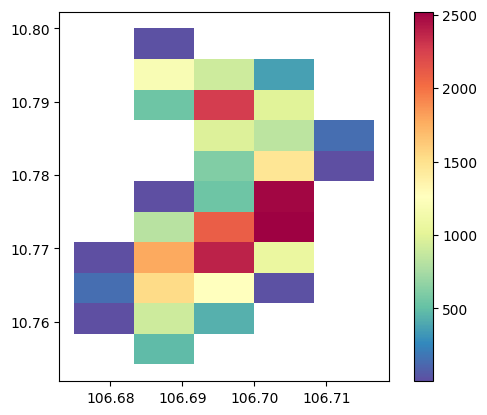

In [4]:
from vgridpandas import maidenheadpandas
import geopandas as gpd

# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
resolution = 4
stats = "count"
df_bin = df.maidenhead.maidenheadbin(resolution=resolution, stats = stats, 
                                # numeric_column="confidence",
                                # category_column="category",
                                return_geometry=True)
df_bin.plot(        
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)